<a href="https://colab.research.google.com/github/Sheetalm21/deep_learning/blob/assignment_3/Assessment3_que1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sheetal Mahajan_20MAI0066


## Importing Libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
from imutils import paths
## Defining model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D,Activation,BatchNormalization,MaxPooling2D,Flatten,Dense,Dropout)
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Data loading and exploration

In [3]:
fpath = "/content/drive/MyDrive/Colab Notebooks/datasets/17flowers/jpg"
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['16', '15', '14', '13', '12', '11', '10', '1', '0', '6', '9', '8', '3', '5', '7', '4', '2'] 

No. of categories =  17


In [4]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  1360 
No. of labels loaded =  1360
<class 'list'> <class 'list'>


In [5]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (1360, 227, 227, 3) 
Labels shape =  (1360,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


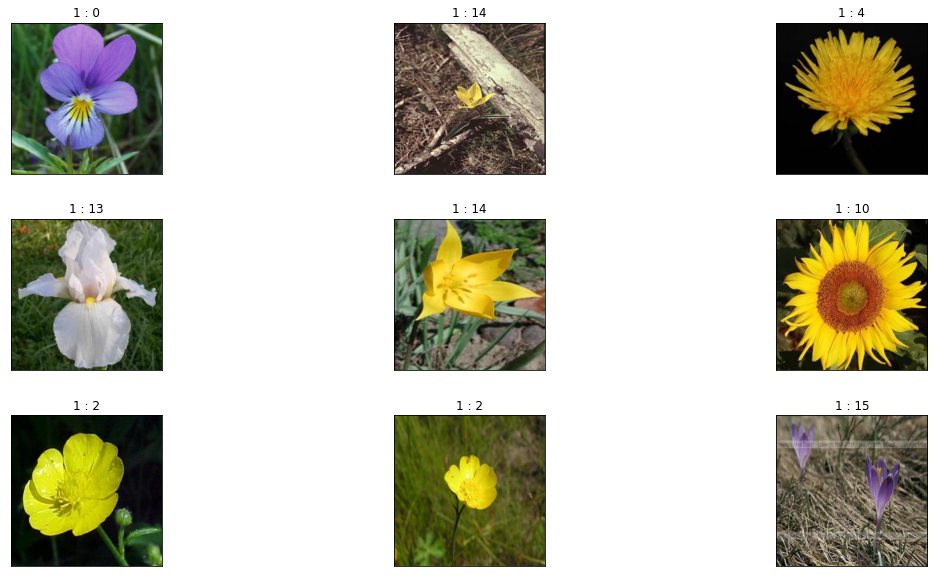

In [6]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('1 : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

## Data Augmentation

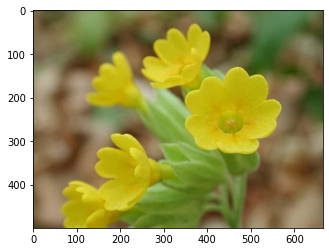

In [7]:
imagepath = '/content/drive/MyDrive/Colab Notebooks/datasets/17flowers/jpg/13/image_1042.jpg'
image = load_img(imagepath)
plt.imshow(image)
plt.show()

In [8]:
image1 = img_to_array(image)
image2 = np.expand_dims(image,axis=0)

In [9]:
aug = ImageDataGenerator(rotation_range=0.2,horizontal_flip=True,vertical_flip=True,width_shift_range=0.1,height_shift_range=0.1,fill_mode='nearest',zoom_range=0.2)

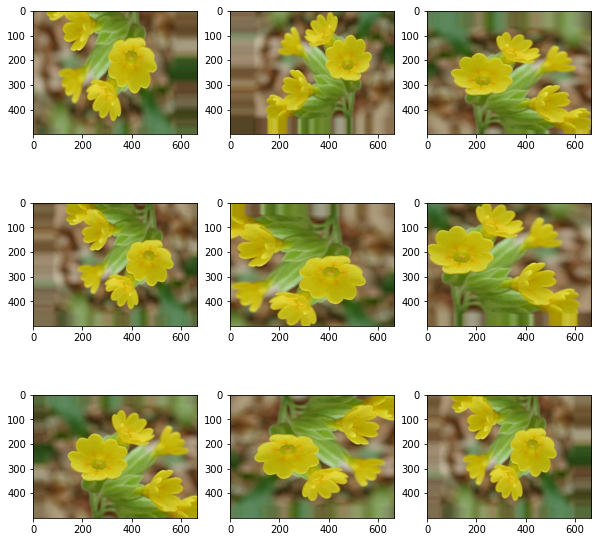

In [10]:
plt.figure(figsize=(10,10))
# load the image
img = load_img(imagepath)
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = np.expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=0.2,horizontal_flip=True,vertical_flip=True,width_shift_range=0.1
                        ,height_shift_range=0.1,fill_mode='nearest',zoom_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

## Data Normalization

In [11]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (1360, 227, 227, 3)


### Display few random images after data normalization

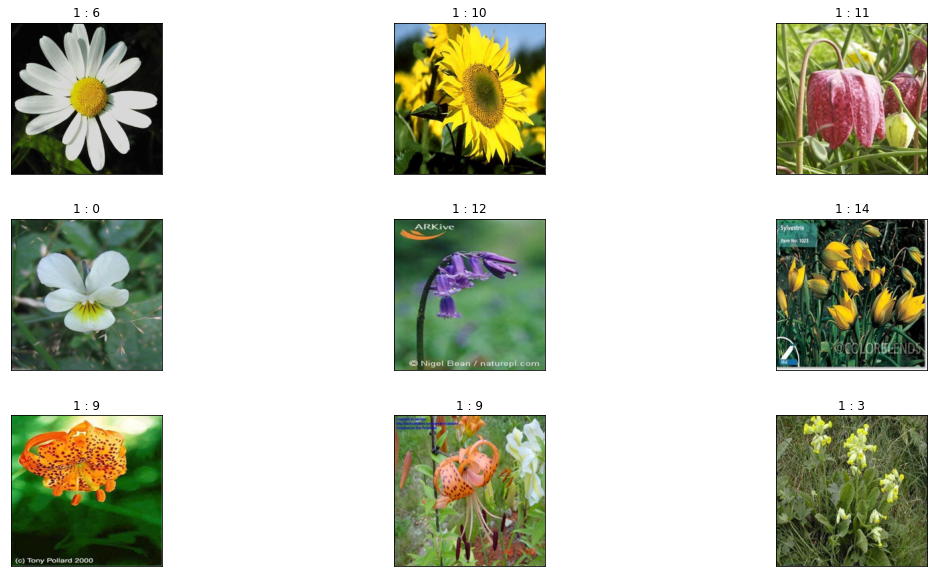

In [12]:

display_rand_images(images, labels)

### Split the loaded dataset into train, test sets

In [13]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (1088, 227, 227, 3)
y_train shape =  (1088,)

x_test shape =  (272, 227, 227, 3)
y_test shape =  (272,)


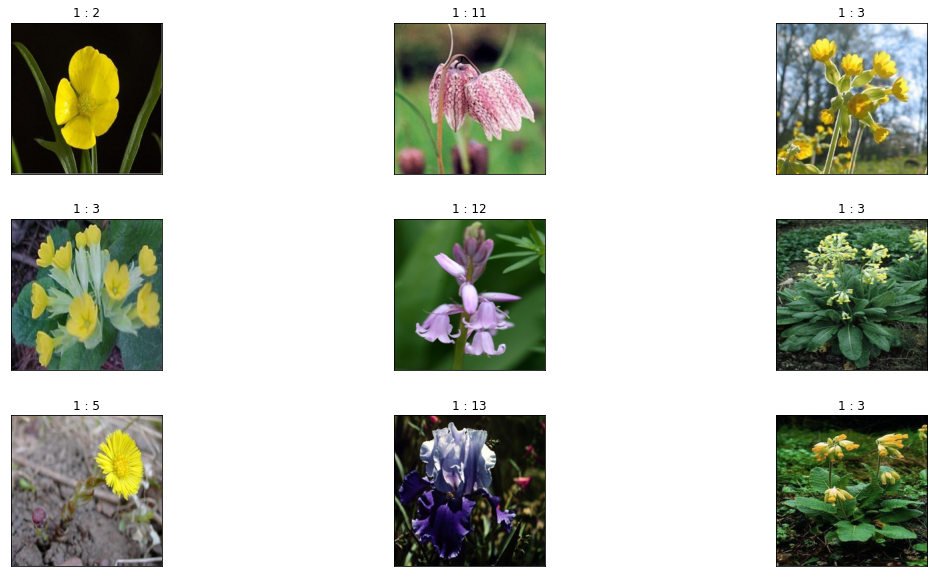

In [14]:
display_rand_images(x_train, y_train)

## Define AlexNet CNN model

first convolution function kernel filter coefficient values


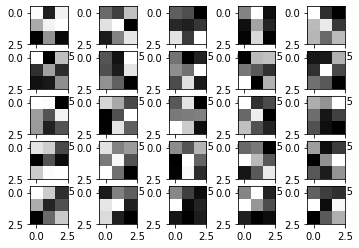





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        55360     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 256)       409856    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 256)    

In [15]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#first convolution function kernel filter coefficient values
import matplotlib.pyplot as plt
print("first convolution function kernel filter coefficient values")
x = Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3))
model.add(x)
x1w = x.get_weights()[0][:,:,0,:]
for i in range(1,26):
      plt.subplot(5,5,i)
      plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()
print("\n\n\n")

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

### Compile the CNN model

In [16]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Train the model

In [17]:
%%time
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 5s 32ms/step - loss: 3.3906 - accuracy: 0.1516
Epoch 2/100
34/34 [==============================] - 1s 31ms/step - loss: 2.4727 - accuracy: 0.2872
Epoch 3/100
34/34 [==============================] - 1s 31ms/step - loss: 2.1483 - accuracy: 0.3502
Epoch 4/100
34/34 [==============================] - 1s 31ms/step - loss: 2.0284 - accuracy: 0.3662
Epoch 5/100
34/34 [==============================] - 1s 32ms/step - loss: 1.6871 - accuracy: 0.4400
Epoch 6/100
34/34 [==============================] - 1s 31ms/step - loss: 1.6928 - accuracy: 0.4319
Epoch 7/100
34/34 [==============================] - 1s 32ms/step - loss: 1.5439 - accuracy: 0.5124
Epoch 8/100
34/34 [==============================] - 1s 31ms/step - loss: 1.3765 - accuracy: 0.5496
Epoch 9/100
34/34 [==============================] - 1s 31ms/step - loss: 1.4708 - accuracy: 0.5217
Epoch 10/100
34/34 [==============================] - 1s 31ms/step - loss: 1.3815 - accuracy: 0.5186

### Metrics to evaluate accuracy and loss in test and train dataset

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)

print("loss for test set= ",loss,"\n Accuracy for test set= ",accuracy)

9/9 [==============================] - 1s 52ms/step - loss: 2.3941 - accuracy: 0.6250
loss for test set=  2.3941330909729004 
 Accuracy for test set=  0.625


In [19]:
pred = model.predict(x_test)

pred.shape

(272, 20)

In [20]:
loss, accuracy = model.evaluate(x_train, y_train)

print("Loss of train dataset",loss,"Accuracy of train dataset",accuracy)

34/34 [==============================] - 1s 17ms/step - loss: 0.0823 - accuracy: 0.9743
Loss of train dataset 0.08233755826950073 Accuracy of train dataset 0.9742646813392639


In [21]:
pred = model.predict(x_test)

pred.shape

(272, 20)

### plot first few input images from training datasets

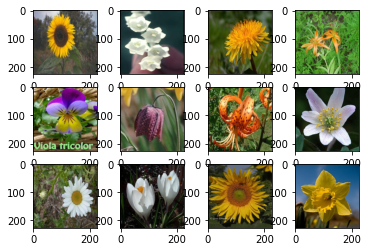

In [25]:
from matplotlib import pyplot

for i in range(12):
    # define subplot
    pyplot.subplot(3,4,i+1)
    # plot raw pixel data
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

### plot first few input images for testing dataset

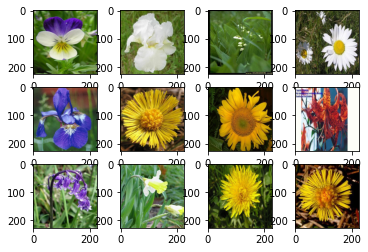

In [26]:
for i in range(12):
    # define subplot
    pyplot.subplot(3,4, i+1)
    # plot raw pixel data
    pyplot.imshow(x_test[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

### Display few random images with actual vs predicted values of labels

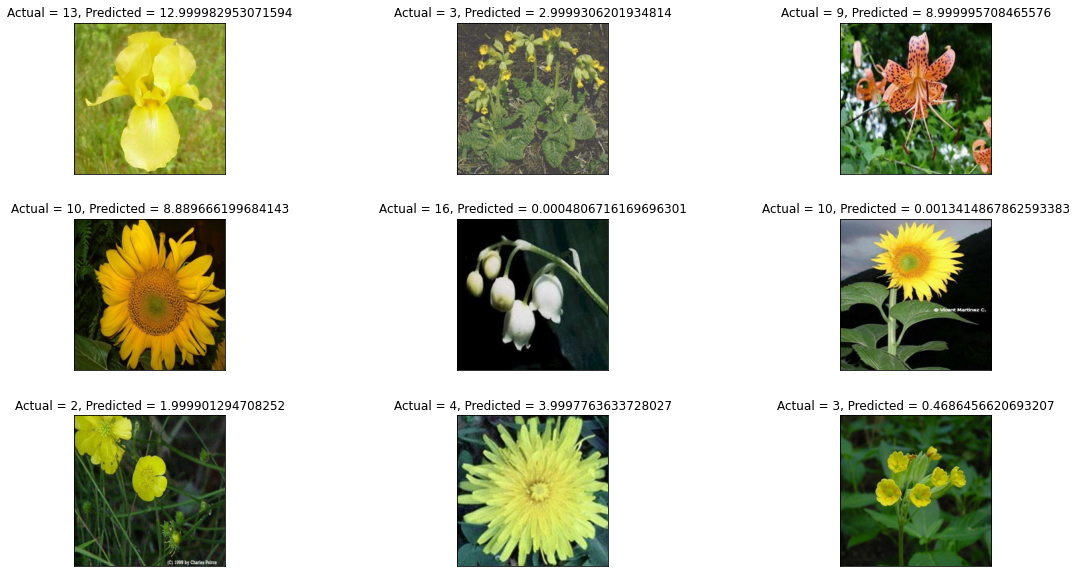

In [27]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()